In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import warnings
import os
import datetime
import seaborn as sns

warnings.filterwarnings(action='ignore')

In [2]:
# Caminho da pasta que terá iteração nos seus arquivos
folder_path = 'C:/Users/USER/Desktop/EstudosDados/Projetos/Corrida/physical_inactivity_prediction/athletes_activities/athlete4'

In [3]:
# Contador de arquivos dentro da pasta

files_count = 0

for file in os.listdir(folder_path):
    files_count += 1

print(files_count)

150


In [4]:
# Caminho do arquivo de atividade com {} para inserir o número
# Nome do arquivo no formato: atividades(x).json onde x >= n.
file_path = "C:/Users/USER/Desktop/EstudosDados/Projetos/Corrida/physical_inactivity_prediction/athletes_activities/athlete4/atividades ({}).json"

n = 1 # Se as atividades começarem por ex com 0, então mudar para n = 0.

# Leitura de cada uma das atividades no formato json com json.load. 
activities_data = [json.load(open(file_path.format(activity),"rb")) for activity in range(n, files_count + n)]

In [5]:
df = pd.DataFrame(activities_data)
df.head()

,id,type,app_id,start_epoch_ms,end_epoch_ms,last_modified,active_duration_ms,session,delete_indicator,summaries,sources,tags,change_tokens,metric_types,metrics,moments
0,0a611c05-cfad-44e5-bb07-e7c53dc61534,run,com.nike.sport.running.ios,1680775468014,1680777275965,1680779398427,1803188,False,False,"[{'metric': 'distance', 'summary': 'total', 's...","[com.nike.running.ios.calculatedcalories, com....",{'com.nike.name': 'quinta-feira corrida matuti...,[a24fcd6ca956e751162ae236d7e08a621be74a66bdd35...,"[elevation, distance, latitude, pace, calories...","[{'type': 'distance', 'unit': 'KM', 'source': ...","[{'key': 'split_km', 'value': '1', 'timestamp'..."
1,0b1d84dc-cbe3-487b-b2c7-8c382873b601,run,com.nike.sport.running.ios,1676629486354,1676631448059,1676634126926,1829197,False,False,"[{'metric': 'distance', 'summary': 'total', 's...","[com.nike.running.ios.calculatedcalories, com....",{'com.nike.name': 'sexta-feira corrida matutin...,[b467c625e6e3aa753d4640c33f1b47eaa65602bab6afe...,"[elevation, distance, latitude, pace, calories...","[{'type': 'distance', 'unit': 'KM', 'source': ...","[{'key': 'split_km', 'value': '1', 'timestamp'..."
2,0c7c17d5-ce8f-436c-a461-d93f505e4664,run,com.nike.sport.running.ios,1644228189492,1644230091731,1644230238366,1899189,False,False,"[{'metric': 'descent', 'summary': 'total', 'so...","[com.nike.running.ios.calculatedcalories, com....",{'com.nike.name': 'segunda-feira corrida matut...,[d0022d027535d3fe298091169c8b9aa6cd327369dc3f3...,"[elevation, distance, latitude, pace, calories...","[{'type': 'distance', 'unit': 'KM', 'source': ...","[{'key': 'split_km', 'value': '1', 'timestamp'..."
3,0fe2f0a4-1d82-498f-bd7b-85f3a4419e97,run,com.nike.sport.running.ios,1669977565044,1669979454378,1669980553125,1886277,False,False,"[{'metric': 'distance', 'summary': 'total', 's...","[com.nike.running.ios.calculatedcalories, com....",{'com.nike.name': 'sexta-feira corrida matutin...,[28de111fa5fbf5eaf1aba810d560b1dc2ee3b098220e3...,"[elevation, distance, latitude, pace, calories...","[{'type': 'distance', 'unit': 'KM', 'source': ...","[{'key': 'split_km', 'value': '1', 'timestamp'..."
4,1dc38513-6c7c-4645-8c99-d28380a92c56,run,com.nike.sport.running.ios,1600943700890,1600945660789,1603924062811,1937233,False,False,"[{'metric': 'descent', 'summary': 'total', 'so...","[com.nike.pacecalculator.v1, com.nike.running....","{'com.nike.name': '24/09/2020', 'com.nike.runn...",[d0dcf7ef34d1e21db58e44ac3bd845b8bf3082e1f3b98...,"[elevation, distance, latitude, pace, calories...","[{'type': 'distance', 'unit': 'KM', 'source': ...","[{'key': 'split_km', 'value': '1', 'timestamp'..."


In [6]:
# Resumo das metricas de cada atividade (as linhas mudam a ordem de acordo com a atividade)
pd.DataFrame(df['summaries'][11])

,metric,summary,source,app_id,value
0,nikefuel,mean,com.nike.nikefuelengine.1.0-A5.0,com.nike.sport.running.ios,42.386923
1,nikefuel,total,com.nike.nikefuelengine.1.0-A5.0,com.nike.sport.running.ios,1295.275136
2,speed,mean,com.nike.running.ios.coremotion,com.nike.sport.running.ios,9.829805
3,calories,total,com.nike.running.ios.calculatedcalories,com.nike.sport.running.ios,275.921000
4,ascent,total,com.nike.running.ios.coremotion,com.nike.sport.running.ios,8.983917
5,pace,mean,com.nike.running.ios.coremotion,com.nike.sport.running.ios,6.103885
6,distance,total,com.nike.running.ios.coremotion,com.nike.sport.running.ios,5.006380
7,descent,total,com.nike.running.ios.coremotion,com.nike.sport.running.ios,9.248146
8,steps,total,com.nike.running.ios.coremotion,com.nike.sport.running.ios,4968.000000


In [7]:
# Lista das metricas que serão identificadas
metrics = ['distance', 'pace', 'speed']

# Dicionário com as features que serão criadas com o valor de cada atividade
df_athlete_dict = {
    'total_distance (km)': [], 
    'pace (min/km)': [],
    'velocity (km/h)': []    
}

# Iteração no número de atividades
for activity in range(len(df)):
    # Iteração para encontrar a linha com a métrica desejada e adicionar seu valor no dicionário com a chave certa
    for values in df['summaries'][activity]: # por atividade
        if (values['metric'] == metrics[0]): 
            df_athlete_dict['total_distance (km)'].append(round(values['value'],2))
        elif (values['metric'] == metrics[1]):
            df_athlete_dict['pace (min/km)'].append(round(values['value'],2))
        elif (values['metric'] == metrics[2]):
            df_athlete_dict['velocity (km/h)'].append(round(values['value'],2))

In [19]:
# Criação do DataFrame de atividades
df_athlete_activities = pd.DataFrame(df_athlete_dict)

In [14]:
# Tempo inicial da atividade
start = pd.to_datetime(df['start_epoch_ms'],unit='ms').dt.tz_localize('UTC').dt.tz_convert('America/Sao_Paulo').dt.tz_localize(None).dt.round('s')

# Tempo final da atividade
end = pd.to_datetime(df['end_epoch_ms'],unit='ms').dt.tz_localize('UTC').dt.tz_convert('America/Sao_Paulo').dt.tz_localize(None).dt.round('s')

# Criação da coluna com tempo total em minutos a partir da subtração dos tempos final e inicial
df_athlete_activities['total_time (min)'] = (end - start).apply(lambda x: x.total_seconds() // 60)

In [20]:
# Criando a coluna para a data da atividade
#df_athlete_activities.insert(0, 'activity_date', pd.to_datetime(df['end_epoch_ms'],unit='ms').round('d').dt.tz_localize('UTC').dt.tz_convert('America/Sao_Paulo').dt.tz_localize(None).dt.round('d'))
df_athlete_activities.insert(0, 'activity_date', pd.to_datetime(df['end_epoch_ms'],unit='ms').dt.tz_localize('UTC').dt.tz_convert('America/Sao_Paulo').dt.tz_localize(None).dt.normalize())

# Dropando linhas com datas duplicadas
df_athlete_activities.drop_duplicates(subset='activity_date', inplace= True)

# Ordenando o dataframe pela data menor à maior
df_athlete_activities.sort_values('activity_date', ascending=True, inplace=True)

# Resetando o index
df_athlete_activities.reset_index(drop=True, inplace=True)

In [16]:
# Criando uma coluna para o tipo de atividade e designando todas como Atividade
df_athlete_activities.insert(1, 'activity_type', 'Atividade')

In [17]:
# Fazendo a diferença entre a atividade seguinte e a anterior e preenchendo a primeira linha com 0
df_athlete_activities['days_between_activities'] = df_athlete_activities['activity_date'].diff(periods=1).fillna(datetime.timedelta(days=1))

# Alterando o tipo da coluna para int
df_athlete_activities['days_between_activities'] = (df_athlete_activities['days_between_activities'].dt.days) - 1

In [21]:
df_athlete_activities.head()

,activity_date,total_distance (km),pace (min/km),velocity (km/h)
0,2020-06-13,8.06,7.07,8.49
1,2020-06-16,8.04,6.69,8.96
2,2020-06-20,10.05,6.51,9.21
3,2020-06-25,5.03,6.34,9.46
4,2020-06-28,7.03,6.32,9.49


In [19]:
# Data da primeira atividade
start = df_athlete_activities['activity_date'].iloc[0]

# Data da última atividade
end = df_athlete_activities['activity_date'].iloc[-1]

# Dias entre a primeira e última atividade
dates = pd.date_range(start, end, freq='d').round('d')

# Colocando todas as datas em um df
df_dates = pd.DataFrame({'activity_date': dates})
df_dates

,activity_date
0,2020-06-14
1,2020-06-15
2,2020-06-16
3,2020-06-17
4,2020-06-18
...,...
1195,2023-09-22
1196,2023-09-23
1197,2023-09-24
1198,2023-09-25


In [20]:
# Right join pra poder manter os dados das atividades existentes mas adicionar linhas para os novos dias
df_athlete_activities = df_dates.merge(df_athlete_activities, on='activity_date', how='left')

# Preechendo os valores nulos como Dia sem atividade
df_athlete_activities['activity_type'].fillna('Dia sem atividade', inplace=True)

df_athlete_activities

,activity_date,activity_type,total_distance (km),pace (min/km),velocity (km/h),total_time (min),days_between_activities
0,2020-06-14,Atividade,8.06,7.07,8.49,58.0,0.0
1,2020-06-15,Dia sem atividade,NaN,NaN,NaN,NaN,NaN
2,2020-06-16,Atividade,8.04,6.69,8.96,53.0,1.0
3,2020-06-17,Dia sem atividade,NaN,NaN,NaN,NaN,NaN
4,2020-06-18,Dia sem atividade,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1195,2023-09-22,Atividade,5.01,7.14,8.40,36.0,2.0
1196,2023-09-23,Dia sem atividade,NaN,NaN,NaN,NaN,NaN
1197,2023-09-24,Dia sem atividade,NaN,NaN,NaN,NaN,NaN
1198,2023-09-25,Dia sem atividade,NaN,NaN,NaN,NaN,NaN


In [21]:
# Preenchendo os valores NaN com 1 para poder fazer uma subtração cumulativa
df_athlete_activities['days_between_activities'].fillna(-1, inplace= True)

# Fazendo cumsum com valores negativos e depois multiplicando por -1 pra transformá-los em positivos
df_athlete_activities['days_between_activities'] = df_athlete_activities['days_between_activities'].cumsum() * -1

# Transformando em int pra evitar -0 ao invés de 0
df_athlete_activities['days_between_activities'] = df_athlete_activities['days_between_activities'].astype(int)

In [22]:
df_athlete_activities

,activity_date,activity_type,total_distance (km),pace (min/km),velocity (km/h),total_time (min),days_between_activities
0,2020-06-14,Atividade,8.06,7.07,8.49,58.0,0
1,2020-06-15,Dia sem atividade,NaN,NaN,NaN,NaN,1
2,2020-06-16,Atividade,8.04,6.69,8.96,53.0,0
3,2020-06-17,Dia sem atividade,NaN,NaN,NaN,NaN,1
4,2020-06-18,Dia sem atividade,NaN,NaN,NaN,NaN,2
...,...,...,...,...,...,...,...
1195,2023-09-22,Atividade,5.01,7.14,8.40,36.0,0
1196,2023-09-23,Dia sem atividade,NaN,NaN,NaN,NaN,1
1197,2023-09-24,Dia sem atividade,NaN,NaN,NaN,NaN,2
1198,2023-09-25,Dia sem atividade,NaN,NaN,NaN,NaN,3


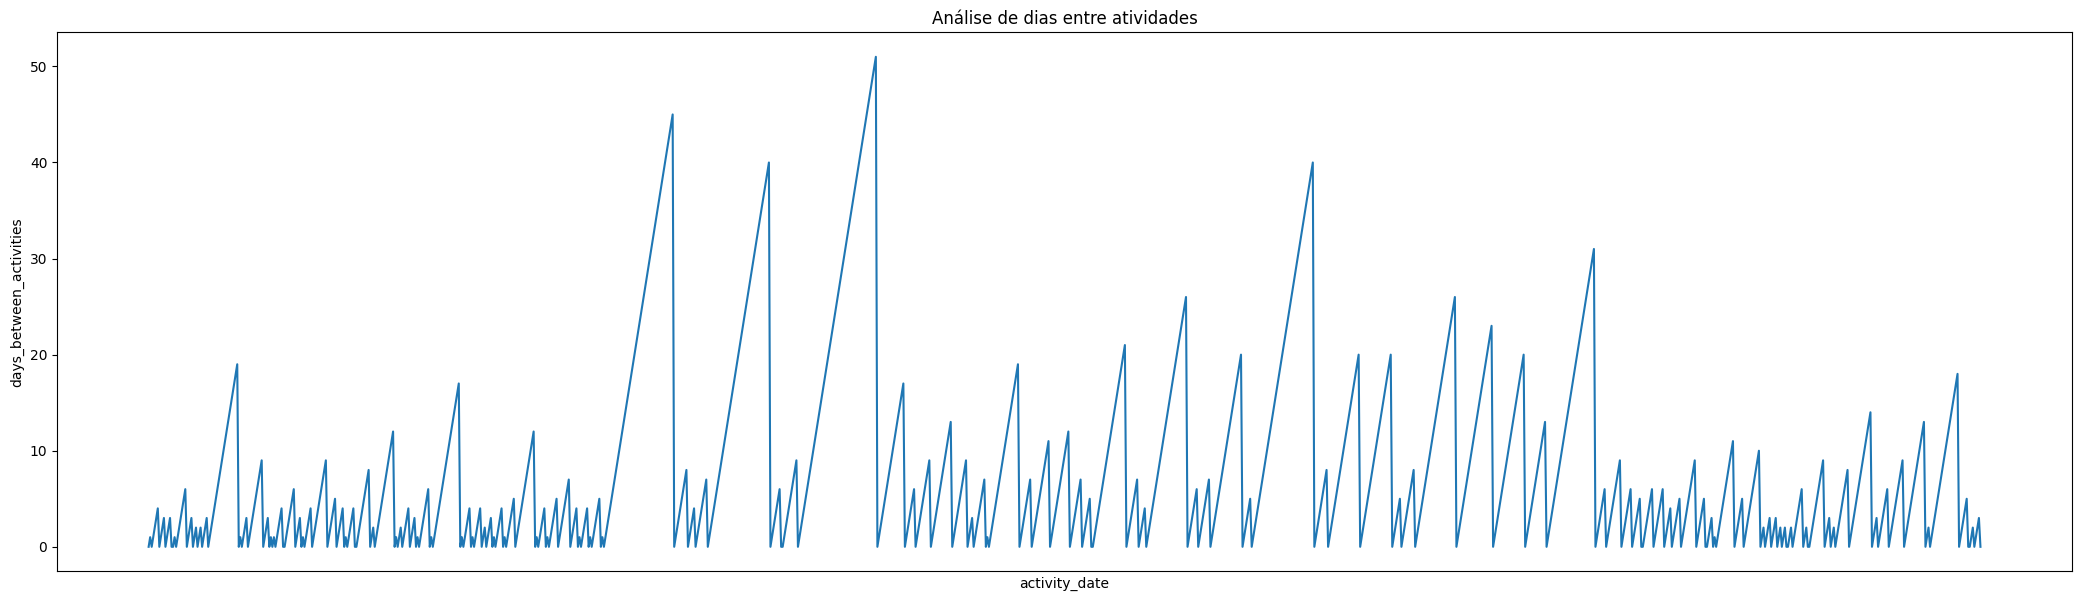

In [23]:
fig, ax = plt.subplots(figsize =(26, 7))
sns.lineplot(x = 'activity_date', y= 'days_between_activities', data= df_athlete_activities)
plt.xticks([])
plt.title('Análise de dias entre atividades')
plt.show()

In [24]:
df_athlete_activities['days_between_activities'].describe()

count    1200.000000
mean        8.100833
std         9.530286
min         0.000000
25%         2.000000
50%         5.000000
75%        11.000000
max        51.000000
Name: days_between_activities, dtype: float64